# IMDB Datasets Example

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import re

from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

### 1) Veri Setinin Yüklenmesi

In [7]:
df = pd.read_csv("IMDB Dataset.csv")
documents = df["review"]

<b>Metin Temizleme</b>

In [8]:
def clean_text(text):
    text = text.lower() # Küçük harf
    text = re.sub(r"\d+","",text) # Sayıları temizle
    text = re.sub(r"[^\w\s]","",text) # Özel karakterleri temizle
    text = " ".join([word for word in text.split() if len(word) > 2 ])
    return text

In [9]:
clean_text("ASDDSA as Merhaba Dunya !+%&/()=#$½ ")

'asddsa merhaba dunya'

### 2)Metin Tokenize İşlemi

In [12]:
cleaned_documents = [clean_text(doc) for doc in documents]
tokenize_documents = [simple_preprocess(doc) for doc in cleaned_documents]
len(tokenize_documents)

50000

In [28]:
# tokenize_documents[0:5]

### 3)Word2Vec Modeli Tamımlama

In [17]:
model = Word2Vec(sentences = tokenize_documents , vector_size = 50 , window = 5 , min_count = 1 , sg = 0)
word_vectors = model.wv

words = list(word_vectors.index_to_key)[:500]
vectors = [word_vectors[word] for word in words]

### 4)Clustering KMeans K=2

In [18]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(vectors)
clusters = kmeans.labels_

C:\Users\emirh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### 5)PCA 50 -> 2

In [20]:
pca = PCA(n_components = 2)
reduced_vectors = pca.fit_transform(vectors)
reduced_vectors[0:5]

array([[-1.05040389, -2.27732889],
       [-2.09250974, -0.6862959 ],
       [ 3.22271387, -3.92041594],
       [-0.52006441, -5.72066817],
       [ 1.89966478,  4.09214613]])

### 6)2 Boyutlu Görselleştirme

Text(0.5, 1.0, 'Word2Vec')

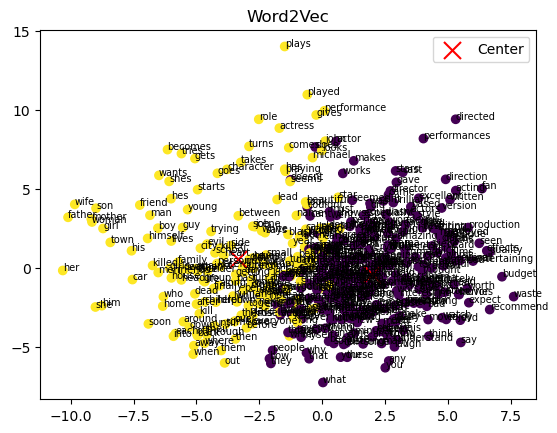

In [24]:
plt.figure()
plt.scatter(reduced_vectors[:,0],reduced_vectors[:,1],c = clusters , cmap = "viridis")

centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0],centers[:,1],c = "red" , marker = "x" , s = 150 , label = "Center")
plt.legend()
for i,word in enumerate(words):
    plt.text(reduced_vectors[i,0],reduced_vectors[i,1] , word , fontsize = 7)

plt.title("Word2Vec")